In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
from sklearn.linear_model import SGDClassifier

In [6]:
sgd=SGDClassifier(random_state=42)
sgd.fit(train_scaled, train_target)
print(sgd.score(train_scaled, train_target))
print(sgd.score(test_scaled, test_target))

0.907563025210084
0.925


In [7]:
# 교재
sgd2=SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sgd2.fit(train_scaled, train_target)
print(sgd2.score(train_scaled, train_target))
print(sgd2.score(test_scaled, test_target))

0.773109243697479
0.775


c:\ProgramData\anaconda3\envs\mldltest2\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
# 반복횟수가 적어서 추가로 훈련할 경우 partial_fit() 메서드를 사용하여 1 에포크(epoch)씩 이어서 훈련

In [8]:
sgd2.partial_fit(train_scaled, train_target)
print(sgd2.score(train_scaled, train_target))
print(sgd2.score(test_scaled, test_target))

0.8151260504201681
0.85


## 에포크와 과대/과소적합

In [9]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [10]:
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [11]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

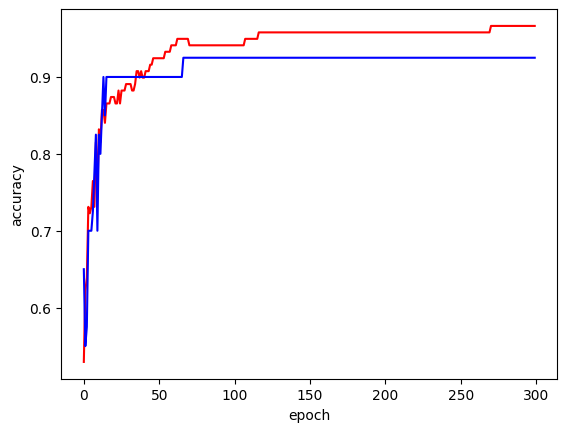

In [12]:
import matplotlib.pyplot as plt

plt.plot(train_score, 'r')
plt.plot(test_score, 'b')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 최종 모델 만들기

In [13]:
sgd_final=SGDClassifier(loss='log_loss', max_iter=100, random_state=42)
sgd_final.fit(train_scaled, train_target)
print(sgd_final.score(train_scaled, train_target))
print(sgd_final.score(test_scaled, test_target))

0.8403361344537815
0.8


In [14]:
sgd_final2=SGDClassifier(loss='hinge', max_iter=100, random_state=42)
sgd_final2.fit(train_scaled, train_target)
print(sgd_final2.score(train_scaled, train_target))
print(sgd_final2.score(test_scaled, test_target))

0.907563025210084
0.925


In [15]:
sgd_final3=SGDClassifier(loss='hinge', max_iter=100, random_state=42, tol=None)
sgd_final3.fit(train_scaled, train_target)
print(sgd_final3.score(train_scaled, train_target))
print(sgd_final3.score(test_scaled, test_target))

0.9495798319327731
0.925
